# LSTM FROM SCRATCH
---
>  LSTM architectures involves the memory cell which is controlled by three gates:
---


* Input gate: Controls what information is added to the memory cell.
* Forget gate: Determines what information is removed from the memory cell.
* Output gate: Controls what information is output from the memory cell.
---
<img src="https://media.geeksforgeeks.org/wp-content/uploads/20250404172141987003/gate_of_lstm.webp" width = 500 >

*IMAGE FROM GEEKS FROM GEEKS*

## LSTM Equations

The operations for a single LSTM cell are as follows:

1. **Forget Gate**  
$$
f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f)
$$

2. **Input Gate**  
$$
i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i)
$$
$$
\tilde{C}_t = \tanh(W_C \cdot [h_{t-1}, x_t] + b_C)
$$

3. **Cell State Update**  
$$
C_t = f_t \odot C_{t-1} + i_t \odot \tilde{C}_t
$$

4. **Output Gate**  
$$
o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o)
$$

5. **Hidden State Update**  
$$
h_t = o_t \odot \tanh(C_t)
$$

**Where:**
- \( \sigma \) is the sigmoid activation function.
- \( \tanh \) is the hyperbolic tangent function.
- \( \odot \) denotes element-wise multiplication.
- \( x_t \) is the input at time step \( t \).
- \( h_t \) is the hidden state at time step \( t \).
- \( C_t \) is the cell state at time step \( t \).



NOTE: FINAL OUTPUT IS COMBINATION FROM OUTPUT OF ALL GATES

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import string
%matplotlib inline

In [5]:
data = """
Natural Language Processing (NLP) is a branch of artificial intelligence that
focuses on the interaction between computers and human language. Its goal is to
enable machines to read, interpret, and generate language in a way that is both
meaningful and useful. At its core, NLP combines computational linguistics,
machine learning, and deep learning models to process text and speech data.

One of the fundamental tasks in NLP is tokenization, the process of breaking
text into smaller units such as words or subwords. This step is crucial for
downstream tasks such as part-of-speech tagging, named entity recognition, and
sentiment analysis. Another core concept is stemming and lemmatization, which
reduce words to their base or root form, improving the consistency of input
data for algorithms.

Modern NLP systems often rely on embeddings, dense vector representations of
words or sentences that capture semantic meaning. Models like Word2Vec, GloVe,
and contextual embeddings from transformers such as BERT have significantly
improved NLP performance. Recurrent neural networks, LSTMs, and GRUs are widely
used for sequence modeling, while attention mechanisms and transformer
architectures have revolutionized language understanding and generation.

The applications of NLP span from chatbots and search engines to machine
translation and sentiment-aware systems.
"""


### Data Preparation
* cleaning

In [6]:
# remove \n
data = data.replace("\n", " ")
# lower cases
data = data.lower()

In [14]:
# Remove all punctuation characters from the text in 'data'
data = data.translate(str.maketrans('', '', string.punctuation))
# removing first and last blank space
data = data[1:-1]

In [20]:
display(data)

'natural language processing nlp is a branch of artificial intelligence that  focuses on the interaction between computers and human language its goal is to  enable machines to read interpret and generate language in a way that is both  meaningful and useful at its core nlp combines computational linguistics  machine learning and deep learning models to process text and speech data  one of the fundamental tasks in nlp is tokenization the process of breaking  text into smaller units such as words or subwords this step is crucial for  downstream tasks such as partofspeech tagging named entity recognition and  sentiment analysis another core concept is stemming and lemmatization which  reduce words to their base or root form improving the consistency of input  data for algorithms  modern nlp systems often rely on embeddings dense vector representations of  words or sentences that capture semantic meaning models like word2vec glove  and contextual embeddings from transformers such as bert 

In [21]:
chars = sorted(set(data))

char_to_idx = {c:i for (i,c) in enumerate(chars)}
idx_to_char = {i:c for (i,c) in enumerate(chars)}

In [23]:
char_to_idx , idx_to_char

({' ': 0,
  '2': 1,
  'a': 2,
  'b': 3,
  'c': 4,
  'd': 5,
  'e': 6,
  'f': 7,
  'g': 8,
  'h': 9,
  'i': 10,
  'k': 11,
  'l': 12,
  'm': 13,
  'n': 14,
  'o': 15,
  'p': 16,
  'q': 17,
  'r': 18,
  's': 19,
  't': 20,
  'u': 21,
  'v': 22,
  'w': 23,
  'x': 24,
  'y': 25,
  'z': 26},
 {0: ' ',
  1: '2',
  2: 'a',
  3: 'b',
  4: 'c',
  5: 'd',
  6: 'e',
  7: 'f',
  8: 'g',
  9: 'h',
  10: 'i',
  11: 'k',
  12: 'l',
  13: 'm',
  14: 'n',
  15: 'o',
  16: 'p',
  17: 'q',
  18: 'r',
  19: 's',
  20: 't',
  21: 'u',
  22: 'v',
  23: 'w',
  24: 'x',
  25: 'y',
  26: 'z'})

In [24]:
data_size = len(data)
char_size = len(chars)
data_size , char_size

(1353, 27)

In [25]:
# parameters
hidden_size = 10
weight_sd = 0.1
z_size = hidden_size + char_size
t_steps = 25

In [26]:
# activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def dsigmoid(y):
    return y * (1 - y)

def tanh(x):
    return np.tanh(x)

def dtanh(y):
    return 1 - y * y

In [27]:
def forward(x, u, q):
    z = np.row_stack((q, x))

    a = sigmoid(np.dot(wa, z) + ba)
    b = sigmoid(np.dot(wb, z) + bb)
    c = tanh(np.dot(wc, z) + bc)
    d = sigmoid(np.dot(wd, z) + bd)

    e = a * u + b * c
    h = d * tanh(e)

    v = np.dot(wv, h) + bv
    y = np.exp(v) / np.sum(np.exp(v))

    return z, a, b, c, d, e, h, v, y

In [28]:
def optimize(grads, theta, lr=0.05):
    dwa, dwb, dwc, dwd, dwv, dba, dbb, dbc, dbd, dbv = grads
    wa, wb, wc, wd, wv, ba, bb, bc, bd, bv = theta

    wa -= dwa * lr
    wb -= dwb * lr
    wc -= dwc * lr
    wd -= dwd * lr
    wv -= dwv * lr

    ba -= dba * lr
    bb -= dbb * lr
    bc -= dbc * lr
    bd -= dbd * lr
    bv -= dbv * lr

    return wa, wb, wc, wd, wv, ba, bb, bc, bd, bv

In [29]:
# initialize variables
losses = {}
z, a, b, c, d, e, h, v, y = {}, {}, {}, {}, {}, {}, {}, {}, {}
q, x, u = {}, {}, {}

In [30]:
wa, wb, wc, wd = [np.random.randn(hidden_size, z_size) * weight_sd + 0.5 for x in range(4)]
ba, bb, bc, bd = [np.zeros((hidden_size, 1)) for x in range(4)]

# output
wv = np.random.randn(char_size, hidden_size) * weight_sd
bv = np.zeros((char_size, 1))

In [32]:
q[-1] = np.zeros((hidden_size, 1))
u[-1] = np.zeros((hidden_size, 1))

pointer = 25
t_steps = 25

inputs = ([char_to_idx[ch] for ch in data[pointer: pointer + t_steps]])
targets = ([char_to_idx[ch] for ch in data[pointer + 1: pointer + t_steps + 1]])

In [33]:
for epoch in range(1000):

    loss = 0

    # Forward propagation
    for t in range(len(inputs)):
        x[t] = np.zeros((char_size, 1))
        x[t][inputs[t]] = 1

        z[t], a[t], b[t], c[t], d[t], e[t], h[t], v[t], y[t] = forward(x[t], u[t - 1], q[t - 1])

        u[t], q[t] = e[t], h[t]

        loss += -np.log(y[t][targets[t], 0])


    dh_next = np.zeros_like(q[0])
    de_next = np.zeros_like(u[0])
    dwa, dwb, dwc, dwd, dwv, dba, dbb, dbc, dbd, dbv = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

    # Backward propagation
    for t in reversed(range(len(inputs))):
        target = targets[t]

        dv = np.copy(y[t])
        dv[target] -= 1

        dwv += np.dot(dv, h[t].T)
        dbv += dv

        dh = np.dot(wv.T, dv)
        dh += dh_next

        dd = dh * tanh(e[t])
        dd = dsigmoid(d[t]) * dd

        dwd += np.dot(dd, z[t].T)
        dbd += dd

        de = np.copy(de_next)
        de += dh * d[t] * dtanh(tanh(e[t]))

        dc = de * b[t]
        dc = dtanh(c[t]) * dc

        dwc += np.dot(dc, z[t].T)
        dbc += dc

        db = de * dc
        db = dsigmoid(b[t]) * db

        dwb += np.dot(db, z[t].T)
        dbb += db

        da = de * u[t - 1]
        da = dsigmoid(a[t]) * da

        dwa += np.dot(da, z[t].T)
        dba += da

        dz = (np.dot(wa.T, da)
              + np.dot(wb.T, db)
              + np.dot(wc.T, dc)
              + np.dot(dd.T, dd))

        dh_next = dz[:hidden_size, :]
        de_next = a[t] * de


    grads = dwa, dwb, dwc, dwd, dwv, dba, dbb, dbc, dbd, dbv
    theta = wa, wb, wc, wd, wv, ba, bb, bc, bd, bv

    # optimize with SGD the training data
    wa, wb, wc, wd, wv, ba, bb, bc, bd, bv = optimize(grads, theta)

    losses[epoch] = loss


/tmp/ipython-input-4287064575.py:2: DeprecationWarning: `row_stack` alias is deprecated. Use `np.vstack` directly.
  z = np.row_stack((q, x))


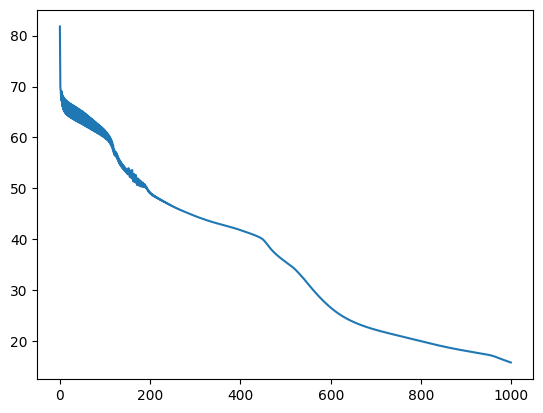

In [34]:
plt.plot(list(losses.keys()), [losses[x] for x in list(losses.keys())])
